In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("income.csv", names=['name','age','income'], skiprows=[0])

data.head()

,name,age,income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
df = data.drop('name', axis='columns')

df.head()

,age,income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


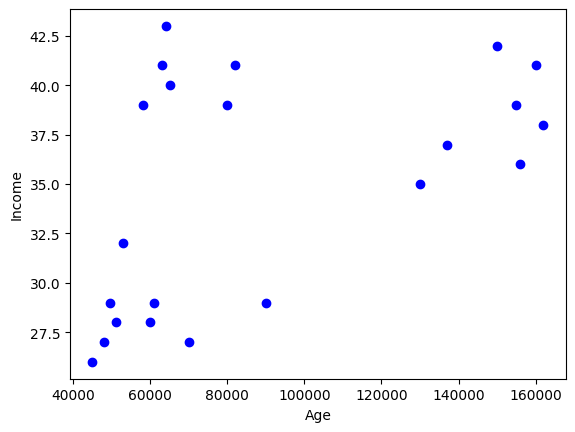

In [4]:
plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter(df.income, df.age, color='blue')

### K-Means clustering

I selected 3 clusters cuz I can see by the scatter plot, three groups of datapoints are close together

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [6]:
km.fit_predict(df)

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
km_pred = km.fit_predict(df)
df['cluster'] = km_pred

df.head()

,age,income,cluster
0,27,70000,0
1,29,90000,0
2,29,61000,2
3,28,60000,2
4,42,150000,1


In [8]:
df.cluster.unique()

array([0, 2, 1])

In [9]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

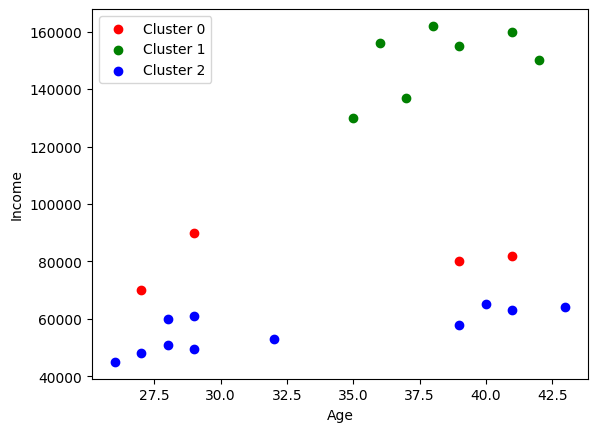

In [10]:
plt.scatter(df0.age, df0.income, color='red', label='Cluster 0')
plt.scatter(df1.age, df1.income, color='green', label='Cluster 1')
plt.scatter(df2.age, df2.income, color='blue', label='Cluster 2')

plt.xlabel("Age")
plt.ylabel("Income")

plt.legend()

From the above we can see **Cluster 0** and **Cluster 2** are grouping with eachother, this is because of the **"Income"** axis exceeding more than **160k values** and **"Age"** with only **42 values**

We will use a preprocessing technique called **min max scaler** to get rid of this issue

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [12]:
# fitting scaler with each column
scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])

df.head()

,age,income,cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,1


In [14]:
km_pred2 = km.fit_predict(df[['age','income']])
df['cluster2'] = km_pred2

df.head()

,age,income,cluster,cluster2
0,0.058824,0.213675,0,0
1,0.176471,0.384615,0,0
2,0.176471,0.136752,2,0
3,0.117647,0.128205,2,0
4,0.941176,0.897436,1,1


In [20]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

The above are the **3 Centroids (x, y)** in the scatterplot that we are gonna plot

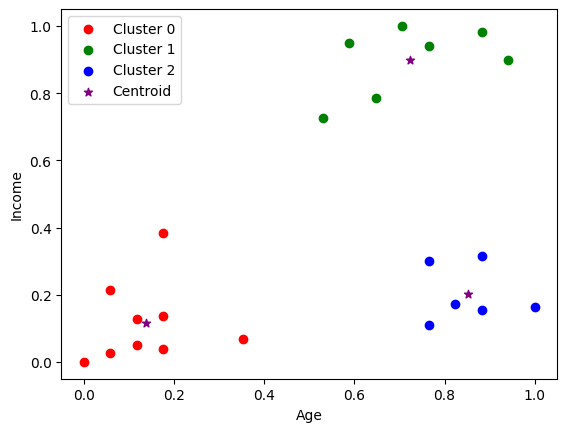

In [22]:
df0 = df[df.cluster2==0]
df1 = df[df.cluster2==1]
df2 = df[df.cluster2==2]

plt.scatter(df0.age, df0.income, color='red', label='Cluster 0')
plt.scatter(df1.age, df1.income, color='green', label='Cluster 1')
plt.scatter(df2.age, df2.income, color='blue', label='Cluster 2')
# lets print the 3 Centroids
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='Centroid')

plt.xlabel("Age")
plt.ylabel("Income")

plt.legend()

#### Insane right? we can clearly see the 3 Centroids with their clusters

### Elbow method
- This method is used when we have large dataset and have so many features.
- Elbow method uses something called "SSE" (Sum of Squared Errors).
- SSE will help us find correct **k** value for the data.

In [25]:
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['age','income']])
    sse.append(km.inertia_)

In [35]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.22020960864009398,
 0.16869711728567788,
 0.13706529523670868,
 0.1107356952741864]

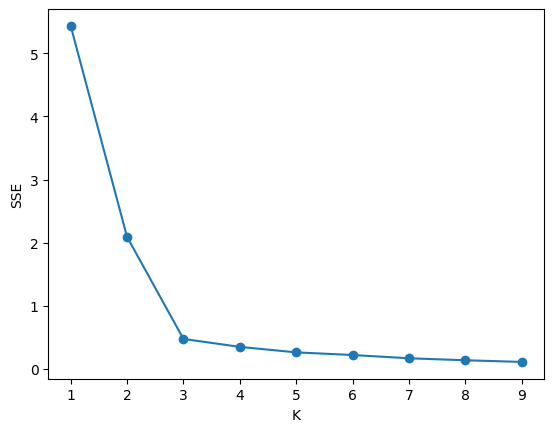

In [32]:
plt.xlabel("K")
plt.ylabel("SSE")
plt.scatter(k_range, sse)
plt.plot(k_range, sse)

Now, with this **Elbow method** we can confirm **3** is our correct **k** and we use it to make correct predictions